<a href="https://colab.research.google.com/github/aletbm/MySolutions_StockMarketsAnalytics2025_DataTalks.Club/blob/main/03_Modeling/03_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module 3 Homework (2025 Cohort)

In this homework, we're going to work with categorical variables, first ML models (Decision Trees), and hyperparameter tuning.

Please use the [Colab Module 3](https://github.com/DataTalksClub/stock-markets-analytics-zoomcamp/blob/main/03-modeling/%5B2025%5D_Module_3_Colab_Time_Series_Modeling.ipynb) for all tasks to ensure you have the same dataframe used for the Modeling part, as covered during the lecture.

**HINT**: If you want to avoid data truncation in GitHub's UI, try either of the following options:
* Open the notebook in [Colab, using the GitHub link to the notebook](https://colab.research.google.com/github/DataTalksClub/stock-markets-analytics-zoomcamp/blob/main/03-modeling/%5B2025%5D_Module_3_Colab_Time_Series_Modeling.ipynb).
* Clone the repository to a local folder and open the notebook in Jupyter Notebook.


In [ ]:
!gdown https://drive.google.com/file/d/1mb0ae2M5AouSDlqcUnIwaHq7avwGNrmB/view?usp=sharing --fuzzy -O /content/

Downloading...
From (original): https://drive.google.com/uc?id=1mb0ae2M5AouSDlqcUnIwaHq7avwGNrmB
From (redirected): https://drive.google.com/uc?id=1mb0ae2M5AouSDlqcUnIwaHq7avwGNrmB&confirm=t&uuid=672f4d77-bc3b-4dc0-8b5e-a1c0f16d2c51
To: /content/stocks_df_combined_2025_06_13.parquet.brotli
100% 130M/130M [00:02<00:00, 62.4MB/s]


In [ ]:
import pandas as pd

df = pd.read_parquet("/content/stocks_df_combined_2025_06_13.parquet.brotli", )
df.head()

,Open,High,Low,Close_x,Volume,Dividends,Stock Splits,Ticker,Year,Month,...,growth_brent_oil_7d,growth_brent_oil_30d,growth_brent_oil_90d,growth_brent_oil_365d,growth_btc_usd_1d,growth_btc_usd_3d,growth_btc_usd_7d,growth_btc_usd_30d,growth_btc_usd_90d,growth_btc_usd_365d
0,0.054277,0.062259,0.054277,0.059598,1.031789e+09,0.0,0.0,MSFT,1986,1986-03-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.059598,0.062791,0.059598,0.061726,3.081600e+08,0.0,0.0,MSFT,1986,1986-03-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.061726,0.063323,0.061726,0.062791,1.331712e+08,0.0,0.0,MSFT,1986,1986-03-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.062791,0.063323,0.060662,0.061194,6.776640e+07,0.0,0.0,MSFT,1986,1986-03-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.061194,0.061726,0.059598,0.060130,4.789440e+07,0.0,0.0,MSFT,1986,1986-03-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



---
### Question 1: Dummies for Month and Week-of-Month

**What is the ABSOLUTE CORRELATION VALUE of the most correlated dummy variable <month>_w<week_of_month> with the binary outcome `is_positive_growth_30d_future`?**

From the correlation analysis and modeling, you may have observed that October and November are potentially important seasonal months. In this task, you'll go further by generating dummy variables for both the **Month** and **Week-of-Month** (starting from 1). For example, the first week of October should be coded as: `'October_w1'`.

Once you've generated these new variables, identify the one with the **highest absolute correlation** with `is_positive_growth_30d_future`, and round the result to **three decimal places**.


#### Suggested Steps

1. Use [this StackOverflow reference](https://stackoverflow.com/questions/25249033/week-of-a-month-pandas) to compute the week of the month using the following formula:
  ```python
  (d.day - 1) // 7 + 1
  ```
  

In [ ]:
df = df[df.Date>='2000-01-01']

In [ ]:
df["wom"] = df.Date.apply(lambda d: (d.day-1) // 7 + 1)
df.loc[:,'Weekday'] = df.Date.dt.dayofweek.astype(str)
df.loc[:,'Month'] = df.Date.dt.strftime('%B')

df[["Date", "Month",'Weekday', "wom"]].head()

/tmp/ipython-input-9-278716973.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0' '1' '2' ... '2' '3' '4']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:,'Weekday'] = df.Date.dt.dayofweek.astype(str)
/tmp/ipython-input-9-278716973.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['January' 'January' 'January' ... 'June' 'June' 'June']' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.loc[:,'Month'] = df.Date.dt.strftime('%B')


,Date,Month,Weekday,wom
3490,2000-01-03,January,0,1
3491,2000-01-04,January,1,1
3492,2000-01-05,January,2,1
3493,2000-01-06,January,3,1
3494,2000-01-07,January,4,1



2. Create a new string variable that combines the month name and week of the month.
Example: 'October_w1', 'November_w2', etc.


In [ ]:
df["month_wom"] = df.Month.astype(str) + "_w" + df.wom.astype(str)
df["month_wom"].head()

,month_wom
3490,January_w1
3491,January_w1
3492,January_w1
3493,January_w1
3494,January_w1


3. Add the new variable (e.g., `month_wom`) to your set of **categorical features**.

   Your updated categorical feature list should include:
   - `'Month'`
   - `'Weekday'`
   - `'Ticker'`
   - `'ticker_type'`
   - `'month_wom'`


In [ ]:
categoricals = ["Month", "Weekday", "Ticker", "ticker_type", "month_wom"]
df[categoricals].head()

,Month,Weekday,Ticker,ticker_type,month_wom
3490,January,0,MSFT,US,January_w1
3491,January,1,MSFT,US,January_w1
3492,January,2,MSFT,US,January_w1
3493,January,3,MSFT,US,January_w1
3494,January,4,MSFT,US,January_w1



4. Use [`pandas.get_dummies()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) to generate dummy variables for all categorical features.

   This should result in approximately **115 dummy variables**, including around **60** for the `month_wom` feature (`12 months × up to 5 weeks`).


In [ ]:
dummy_variables = pd.get_dummies(df[categoricals], dtype='int32')
dummy_variables.head()

,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,...,month_wom_October_w1,month_wom_October_w2,month_wom_October_w3,month_wom_October_w4,month_wom_October_w5,month_wom_September_w1,month_wom_September_w2,month_wom_September_w3,month_wom_September_w4,month_wom_September_w5
3490,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3491,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3492,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3493,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3494,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



5. Use [`DataFrame.corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) to compute the correlation between each feature and the target variable `is_positive_growth_30d_future`.


In [ ]:
df_full = pd.concat([df, dummy_variables], axis=1)

dummy_variables["is_positive_growth_30d_future"] = df["is_positive_growth_30d_future"]
corr = dummy_variables.corr()["is_positive_growth_30d_future"]

dummy_variables.drop(columns=["is_positive_growth_30d_future"], inplace=True)

corr

,is_positive_growth_30d_future
Month_April,0.003566
Month_August,-0.014417
Month_December,-0.008483
Month_February,-0.018563
Month_January,-0.035311
...,...
month_wom_September_w2,-0.009391
month_wom_September_w3,-0.006012
month_wom_September_w4,0.013558
month_wom_September_w5,0.012684



6. Filter the correlation results to include only the dummy variables generated from `month_wom`.


In [ ]:
corr_month_wom = corr[corr.index.str.contains("month_wom")].to_frame()
corr_month_wom.head()

,is_positive_growth_30d_future
month_wom_April_w1,-0.001600
month_wom_April_w2,-0.002640
month_wom_April_w3,0.006208
month_wom_April_w4,0.004110
month_wom_April_w5,0.001731


7. Create a new column named `abs_corr` in the correlation results that stores the **absolute value** of the correlations.


In [ ]:
corr_month_wom["abs_corr"] = corr.abs()
corr_month_wom["abs_corr"].head()

,abs_corr
month_wom_April_w1,0.001600
month_wom_April_w2,0.002640
month_wom_April_w3,0.006208
month_wom_April_w4,0.004110
month_wom_April_w5,0.001731


8. Sort the correlation results by `abs_corr` in **descending** order.


In [ ]:
corr_month_wom = corr_month_wom.sort_values(by=["abs_corr"], ascending=False)
corr_month_wom.head()

,is_positive_growth_30d_future,abs_corr
month_wom_October_w4,0.024968,0.024968
month_wom_November_w3,0.022097,0.022097
month_wom_November_w2,0.018822,0.018822
month_wom_January_w2,-0.018327,0.018327
month_wom_October_w3,0.017734,0.017734


9. Identify and report the **highest absolute correlation value** among the `month_wom` dummy variables, rounded to **three decimal places**.


In [ ]:
corr_month_wom.abs_corr.round(3)[:1]

,abs_corr
month_wom_October_w4,0.025


**NOTE**: new dummies will be used as features in the next tasks, please leave them in the dataset.



---
### Question 2:  Define New "Hand" Rules on Macro and Technical Indicator Variables

**What is the precision score for the best of the NEW predictions (`pred3` or `pred4`), rounded to 3 digits after the comma?**

In this task, you'll apply insights from the **visualized decision tree (`clf10`)** (see *Code Snippet 5: 1.4.4 Visualisation*) to manually define and evaluate new predictive rules.


1. **Define two new 'hand' rules** based on branches that lead to 'positive' predictions in the tree:
   - `pred3_manual_dgs10_5`:  
     ```python
     (DGS10 <= 4) & (DGS5 <= 1)
     ```
   - `pred4_manual_dgs10_fedfunds`:  
     ```python
     (DGS10 > 4) & (FEDFUNDS <= 4.795)
     ```
   > **Hint**: This is not exactly the same condition as in the estimated tree (original: `(DGS10 <= 4.825) & (DGS5 <= 0.745)`; `(DGS10 > 4.825) & (FEDFUNDS <= 4.795)`), since in that case, there are no true positive predictions for both variables. Consider why this might be the case.


In [ ]:
pred0_manual_cci = (df_full.cci>200).astype(int)
pred1_manual_prev_g1 = (df_full.growth_30d>1).astype(int)
pred2_manual_prev_g1_and_snp = ((df_full['growth_30d'] > 1) & (df_full['growth_snp500_30d'] > 1)).astype(int)
pred3_manual_dgs10_5 = (df_full.DGS10 <= 4) & (df_full.DGS5 <= 1) #POSITIVE PREDICTIONS
pred4_manual_dgs10_fedfunds = (df_full.DGS10 > 4) & (df_full.FEDFUNDS <= 4.795) #NEGATIVE PREDICTIONS

2. **Extend Code Snippet 3** (Manual "hand rule" predictions):  
   - Implement and apply the above two rules (`pred3`, `pred4`) to your dataset.
   - Add the resulting predictions as new columns in your dataframe (e.g., `new_df`).

In [ ]:
def temporal_split(df, min_date, max_date, train_prop=0.7, val_prop=0.15, test_prop=0.15):
    """
    Splits a DataFrame into three buckets based on the temporal order of the 'Date' column.

    Args:
        df (DataFrame): The DataFrame to split.
        min_date (str or Timestamp): Minimum date in the DataFrame.
        max_date (str or Timestamp): Maximum date in the DataFrame.
        train_prop (float): Proportion of data for training set (default: 0.6).
        val_prop (float): Proportion of data for validation set (default: 0.2).
        test_prop (float): Proportion of data for test set (default: 0.2).

    Returns:
        DataFrame: The input DataFrame with a new column 'split' indicating the split for each row.
    """
    # Define the date intervals
    train_end = min_date + pd.Timedelta(days=(max_date - min_date).days * train_prop)
    val_end = train_end + pd.Timedelta(days=(max_date - min_date).days * val_prop)

    # Assign split labels based on date ranges
    split_labels = []
    for date in df['Date']:
        if date <= train_end:
            split_labels.append('train')
        elif date <= val_end:
            split_labels.append('validation')
        else:
            split_labels.append('test')

    # Add 'split' column to the DataFrame
    df['split'] = split_labels

    return df

min_date_df = df_full.Date.min()
max_date_df = df_full.Date.max()

df_full = temporal_split(df_full,
                         min_date = min_date_df,
                         max_date = max_date_df)

df_full['split'].value_counts()/len(df_full)

,count
split,
train,0.676399
test,0.163758
validation,0.159843


In [ ]:
df_full["pred0_manual_cci"] = pred0_manual_cci.astype(int)
df_full["pred1_manual_prev_g1"] = pred1_manual_prev_g1.astype(int)
df_full["pred2_manual_prev_g1_and_snp"] = pred2_manual_prev_g1_and_snp.astype(int)
df_full["pred3_manual_dgs10_5"] = pred3_manual_dgs10_5.astype(int)
df_full["pred4_manual_dgs10_fedfunds"] = pred4_manual_dgs10_fedfunds.astype(int)
df_full.head()

,Open,High,Low,Close_x,Volume,Dividends,Stock Splits,Ticker,Year,Month,...,month_wom_September_w2,month_wom_September_w3,month_wom_September_w4,month_wom_September_w5,split,pred0_manual_cci,pred1_manual_prev_g1,pred2_manual_prev_g1_and_snp,pred3_manual_dgs10_5,pred4_manual_dgs10_fedfunds
3490,35.975752,36.358881,34.328300,35.726719,53228400.0,0.0,0.0,MSFT,2000,January,...,0,0,0,0,train,0,1,1,0,0
3491,34.807221,35.899137,34.404936,34.519875,54119000.0,0.0,0.0,MSFT,2000,January,...,0,0,0,0,train,0,1,0,0,0
3492,34.060124,35.669264,33.523744,34.883850,64059600.0,0.0,0.0,MSFT,2000,January,...,0,0,0,0,train,0,1,0,0,0
3493,34.385780,34.903004,33.217238,33.715305,54976600.0,0.0,0.0,MSFT,2000,January,...,0,0,0,0,train,0,1,0,0,0
3494,33.293845,34.404917,32.891561,34.155884,62013600.0,0.0,0.0,MSFT,2000,January,...,0,0,0,0,train,0,1,1,0,0



3. **Compute precision**:
   - For the rule that **does** make positive predictions on the TEST set, compute its **precision score**.
   - Use standard precision metrics (`TP / (TP + FP)`).
   - Round the precision score to **three decimal places**.  
     Example: If your result is `0.57897`, your final answer should be: `0.579`.
  > **Hint**: This should already be visible in the code output, as the `IS_CORRECT` and `PREDICTIONS` sets should automatically include the new columns.


In [ ]:
def precision_score(TP, FP):
    return TP/(TP + FP)

PREDICTIONS = [k for k in df_full.keys() if k.startswith('pred')]

for pred_col in PREDICTIONS:
    df_full["is_correct_prediction"] = df_full[pred_col] == df_full.is_positive_growth_30d_future

    filter = (df_full.split == 'test') & (df_full[pred_col] == 1)
    preds = df_full[filter].is_correct_prediction.value_counts().to_dict()
    TP = preds[True]
    FP = preds[False]
    print(f"Precision score for {pred_col} feature: {round(precision_score(TP, FP), 3)}")

Precision score for pred0_manual_cci feature: 0.558
Precision score for pred1_manual_prev_g1 feature: 0.542
Precision score for pred2_manual_prev_g1_and_snp feature: 0.522
Precision score for pred3_manual_dgs10_5 feature: 0.58
Precision score for pred4_manual_dgs10_fedfunds feature: 0.466



---
### Question 3: Unique Correct Predictions from a 10-Level Decision Tree Classifier (`pred5_clf_10`)

**What is the total number of records in the TEST dataset where the new prediction `pred5_clf_10` is correct, while all 'hand' rule predictions (`pred0` to `pred4`) are incorrect?**


To ensure reproducibility, please include the following parameter in the Decision Tree Classifier:
```python
clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
```

#### Step 1: Train the Decision Tree and Generate Predictions

- Initialize a Decision Tree Classifier with a maximum depth of 10 and set `random_state=42` for reproducibility.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_depth = 10
seed = 42
clf = DecisionTreeClassifier(max_depth=max_depth, random_state=seed)

- Fit the classifier on the combined TRAIN and VALIDATION datasets.

In [ ]:
import numpy as np

GROWTH = [g for g in df_full.keys() if (g.find('growth_')==0)&(g.find('future')<0)]

TECHNICAL_INDICATORS = ['adx', 'adxr', 'apo', 'aroon_1','aroon_2', 'aroonosc',
 'bop', 'cci', 'cmo','dx', 'macd', 'macdsignal', 'macdhist', 'macd_ext',
 'macdsignal_ext', 'macdhist_ext', 'macd_fix', 'macdsignal_fix',
 'macdhist_fix', 'mfi', 'minus_di', 'mom', 'plus_di', 'dm', 'ppo',
 'roc', 'rocp', 'rocr', 'rocr100', 'rsi', 'slowk', 'slowd', 'fastk',
 'fastd', 'fastk_rsi', 'fastd_rsi', 'trix', 'ultosc', 'willr',
 'ad', 'adosc', 'obv', 'atr', 'natr', 'ht_dcperiod', 'ht_dcphase',
 'ht_phasor_inphase', 'ht_phasor_quadrature', 'ht_sine_sine', 'ht_sine_leadsine',
 'ht_trendmod', 'avgprice', 'medprice', 'typprice', 'wclprice']


TECHNICAL_PATTERNS = [g for g in df_full.keys() if g.find('cdl')>=0]

CUSTOM_NUMERICAL = ['SMA10', 'SMA20', 'growing_moving_average', 'high_minus_low_relative','volatility', 'ln_volume']

MACRO = ['gdppot_us_yoy', 'gdppot_us_qoq', 'cpi_core_yoy', 'cpi_core_mom', 'FEDFUNDS',
 'DGS1', 'DGS5', 'DGS10']

NUMERICAL = GROWTH + TECHNICAL_INDICATORS + TECHNICAL_PATTERNS + CUSTOM_NUMERICAL + MACRO
DUMMIES = dummy_variables.keys().to_list()

features_list = NUMERICAL+DUMMIES
to_predict = 'is_positive_growth_30d_future'

pd.options.mode.chained_assignment = None

new_df_full = df_full.drop(columns=['Date', 'Ticker'])
new_df_full['ln_volume'] = df_full.Volume.apply(lambda x: np.log(x))
new_df_full.replace([np.inf, -np.inf], np.nan, inplace=True)
new_df_full.fillna(0, inplace=True)

train_df = new_df_full[new_df_full.split.isin(['train','validation'])].copy(deep=True)
val_df = new_df_full[new_df_full.split =='validation'].copy(deep=True)
test_df = new_df_full[new_df_full.split == 'test'].copy(deep=True)

X_all, y_all = new_df_full[features_list], new_df_full[to_predict]
X_train, y_train = train_df[features_list], train_df[to_predict]
X_val, y_val = val_df[features_list], val_df[to_predict]
X_test, y_test = test_df[features_list], test_df[to_predict]

/tmp/ipython-input-23-4123701669.py:32: RuntimeWarning: divide by zero encountered in log
  new_df_full['ln_volume'] = df_full.Volume.apply(lambda x: np.log(x))


In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

- Use the trained model to predict on the entire dataset (TRAIN + VALIDATION + TEST).

In [ ]:
predictions = clf.predict(X_all)

- Store these predictions in a new column named `pred5_clf_10` within your main dataframe.

In [ ]:
new_df_full["pred5_clf_10"] = predictions

- **Hint**: When predicting on the entire dataset, it's easy to join the predictions with the full DataFrame, since the number of records and their order remain the same. You will need to define X_all and y_all and apply the same cleaning steps used previously for X_train, y_train, X_test, and y_test. This makes it straightforward to define a new column, for example:  
  ```python
  df['pred5_clf_10'] = <predictions vector from clf10.predict(X_all)
```

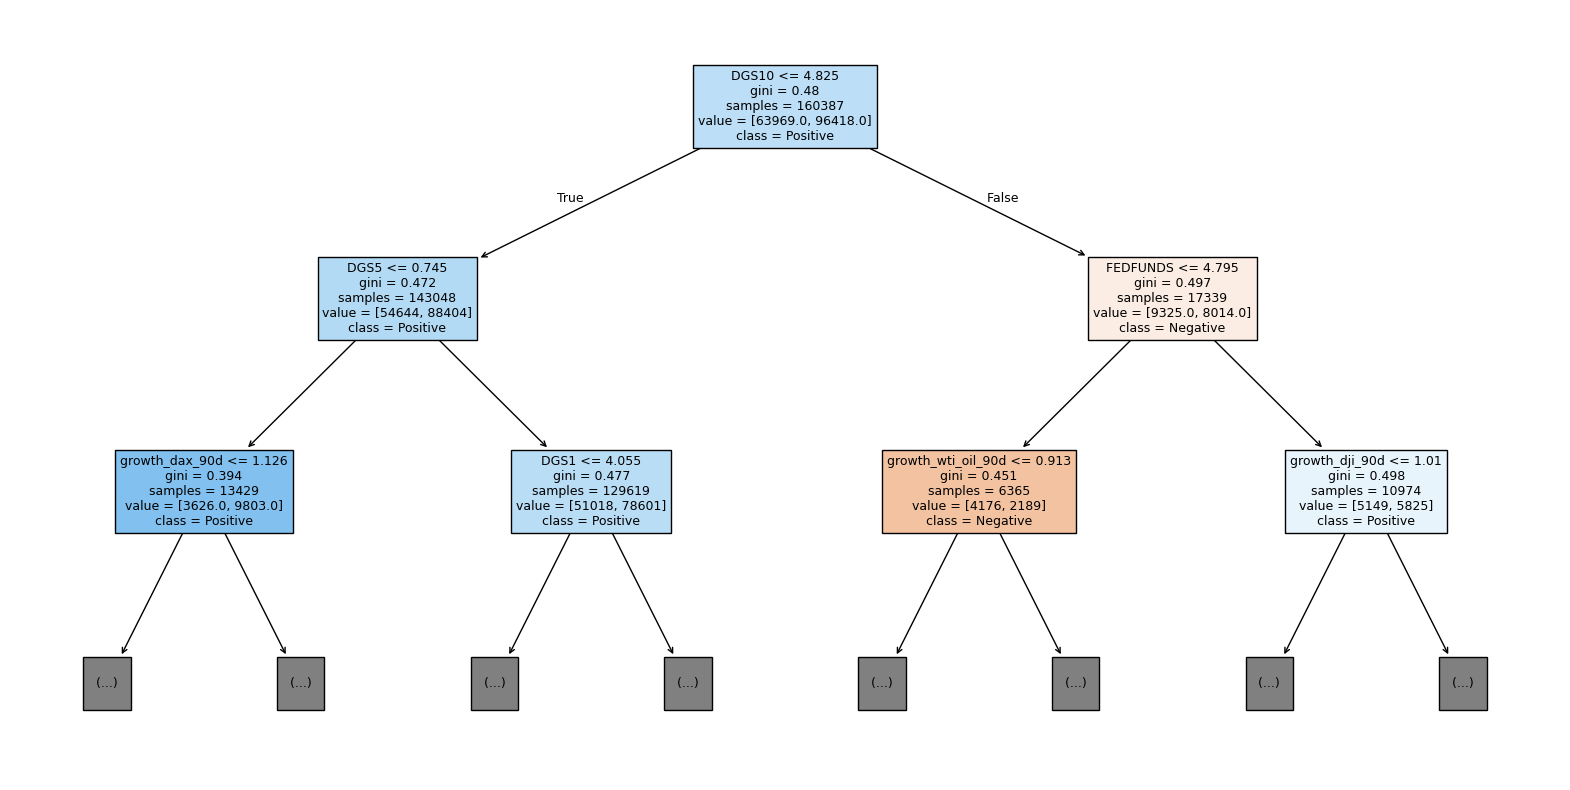

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf,
          filled=True,
          feature_names=X_train.columns,
          class_names=['Negative', 'Positive'],
          max_depth=2)
plt.show()

#### Step 2: Identify Unique Correct Predictions by `pred5_clf_10`

- Create a new boolean column, `only_pred5_is_correct`, that is `True` only when:
  - The prediction from `pred5_clf_10` is correct (i.e., matches the true label).
  - All other hand rule predictions (`pred0` through `pred4`) are incorrect.


In [ ]:
only_pred5_is_correct = new_df_full.pred5_clf_10 == new_df_full.is_positive_growth_30d_future
for pred_col in PREDICTIONS:
    only_pred5_is_correct &= (new_df_full[pred_col] != new_df_full.is_positive_growth_30d_future)

new_df_full["only_pred5_is_correct"] = only_pred5_is_correct
new_df_full["only_pred5_is_correct"].value_counts()

,count
only_pred5_is_correct,
False,165145
True,26650


#### Step 3: Count Unique Correct Predictions on the TEST Set

- Convert the `only_pred5_is_correct` column from boolean to integer.
- Filter the dataframe for records belonging to the TEST dataset.
- Count how many records in the TEST set have `only_pred5_is_correct` equal to 1.
- Report this count as your final answer.


In [ ]:
new_df_full["only_pred5_is_correct"] = new_df_full["only_pred5_is_correct"].astype(int)
new_df_full[new_df_full.split == "test"].only_pred5_is_correct.sum()

np.int64(3770)


### Advanced (Optional)

- To generalize this for many prediction columns (e.g., `pred0` to `pred99`), define a function that can be applied to an entire dataframe row.
- This function should identify whether a specific prediction (`predX`) is uniquely correct (correct while all others are incorrect).
- This approach avoids hardcoding conditions for each predictor and scales easily.
- For examples of how to apply functions to rows in pandas, see this helpful resource:  
  [Pandas apply function to every row](https://sparkbyexamples.com/pandas/pandas-apply-function-to-every-row/)


---
### Question 4:  Hyperparameter tuning for a Decision Tree

**What is the optimal tree depth (from 1 to 20) for a DecisionTreeClassifier?**

**NOTE:** please include `random_state=42` to the Decision Tree Classifier initialization (e.g., `clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)`) to ensure consistency in results.

### Instructions:

- Iterate through `max_depth` values from 1 to 20.
- For each `max_depth`:
  - Train a Decision Tree Classifier with the current `max_depth` on the combined TRAIN+VALIDATION dataset.
- Optionally, visualize how the 'head' (top levels) of each fitted tree changes with increasing tree depth. You can use:
  - [`sklearn.tree.plot_tree()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) for graphical visualization, or
  - The compact textual approach with `export_text()` function. For example:
    ```python
    from sklearn.tree import export_text
    tree_rules = export_text(model, feature_names=list(X_train), max_depth=3)
    print(tree_rules)
    ```


In [ ]:
from sklearn.tree import export_text

clfs = []

for max_depth in range(1, 21):
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=seed)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [ ]:
for clf in clfs:
    tree_rules = export_text(clf, feature_names=list(X_train), max_depth=3)
    print("=="*10 + f" \033[1m\033[32mmax_depth: {max_depth}\033[0m " + "=="*10)
    print(tree_rules)

==================== max_depth: 20 ====================
|--- DGS10 <= 4.83
|   |--- class: 1
|--- DGS10 >  4.83
|   |--- class: 0

==================== max_depth: 20 ====================
|--- DGS10 <= 4.83
|   |--- DGS5 <= 0.75
|   |   |--- class: 1
|   |--- DGS5 >  0.75
|   |   |--- class: 1
|--- DGS10 >  4.83
|   |--- FEDFUNDS <= 4.80
|   |   |--- class: 0
|   |--- FEDFUNDS >  4.80
|   |   |--- class: 1

==================== max_depth: 20 ====================
|--- DGS10 <= 4.83
|   |--- DGS5 <= 0.75
|   |   |--- growth_dax_90d <= 1.13
|   |   |   |--- class: 1
|   |   |--- growth_dax_90d >  1.13
|   |   |   |--- class: 1
|   |--- DGS5 >  0.75
|   |   |--- DGS1 <= 4.06
|   |   |   |--- class: 1
|   |   |--- DGS1 >  4.06
|   |   |   |--- class: 1
|--- DGS10 >  4.83
|   |--- FEDFUNDS <= 4.80
|   |   |--- growth_wti_oil_90d <= 0.91
|   |   |   |--- class: 1
|   |   |--- growth_wti_oil_90d >  0.91
|   |   |   |--- class: 0
|   |--- FEDFUNDS >  4.80
|   |   |--- growth_dji_90d <= 1.01
|   

- Calculate the precision score on the TEST dataset for each fitted tree. You may also track precision on the VALIDATION dataset to observe signs of overfitting.


In [ ]:
def get_TP_FP(predictions, target):
    is_correct_prediction = predictions == target
    preds = is_correct_prediction.value_counts().to_dict()
    TP = preds[True]
    FP = preds[False]
    return TP, FP

precision_scores_test = []
precision_scores_val = []

for clf in clfs:
    predictions = clf.predict(X_test)
    TP, FP = get_TP_FP(predictions, y_test)
    precision_scores_test.append(precision_score(TP, FP))

    predictions = clf.predict(X_val)
    TP, FP = get_TP_FP(predictions, y_val)
    precision_scores_val.append(precision_score(TP, FP))

- Identify the optimal `max_depth` where the precision score on the TEST dataset is highest. This value is your **best_max_depth**.


In [ ]:
best_max_depth = np.argmax(precision_scores_test) + 1
best_max_depth

np.int64(5)

- Using **best_max_depth**, retrain the Decision Tree Classifier on the combined TRAIN+VALIDATION set.


In [ ]:
clf = DecisionTreeClassifier(max_depth=best_max_depth, random_state=seed)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=np.int64(5), random_state=42)

- Predict on the entire dataset (TRAIN + VALIDATION + TEST) and add the predictions as a new column `pred6_clf_best` in your dataframe `new_df`.


In [ ]:
new_df_full["pred6_clf_best"] = clf.predict(X_all)


- Compare the precision score of the tuned tree with previous predictions (`pred0` to `pred5`). You should observe an improvement, ideally achieving precision > 0.58, indicating the tuned tree outperforms earlier models.


In [ ]:
for pred_col in PREDICTIONS+["pred6_clf_best"]:
    new_df_full["is_correct_prediction"] = new_df_full[pred_col] == new_df_full.is_positive_growth_30d_future

    filter = (new_df_full.split == 'test') & (new_df_full[pred_col] == 1)
    preds = new_df_full[filter].is_correct_prediction.value_counts().to_dict()
    TP = preds[True]
    FP = preds[False]
    print(f"Precision score for {pred_col} feature: {round(precision_score(TP, FP), 3)}")

Precision score for pred0_manual_cci feature: 0.558
Precision score for pred1_manual_prev_g1 feature: 0.542
Precision score for pred2_manual_prev_g1_and_snp feature: 0.522
Precision score for pred3_manual_dgs10_5 feature: 0.58
Precision score for pred4_manual_dgs10_fedfunds feature: 0.466
Precision score for pred6_clf_best feature: 0.628



### Advanced (Optional)

- Plot the precision (or accuracy) scores against the `max_depth` values to detect saturation or overfitting trends.
- Observe the trade-off between model complexity (deeper trees) and generalization capability.
- For more information, consult the [scikit-learn Decision Trees documentation](https://scikit-learn.org/stable/modules/tree.html).


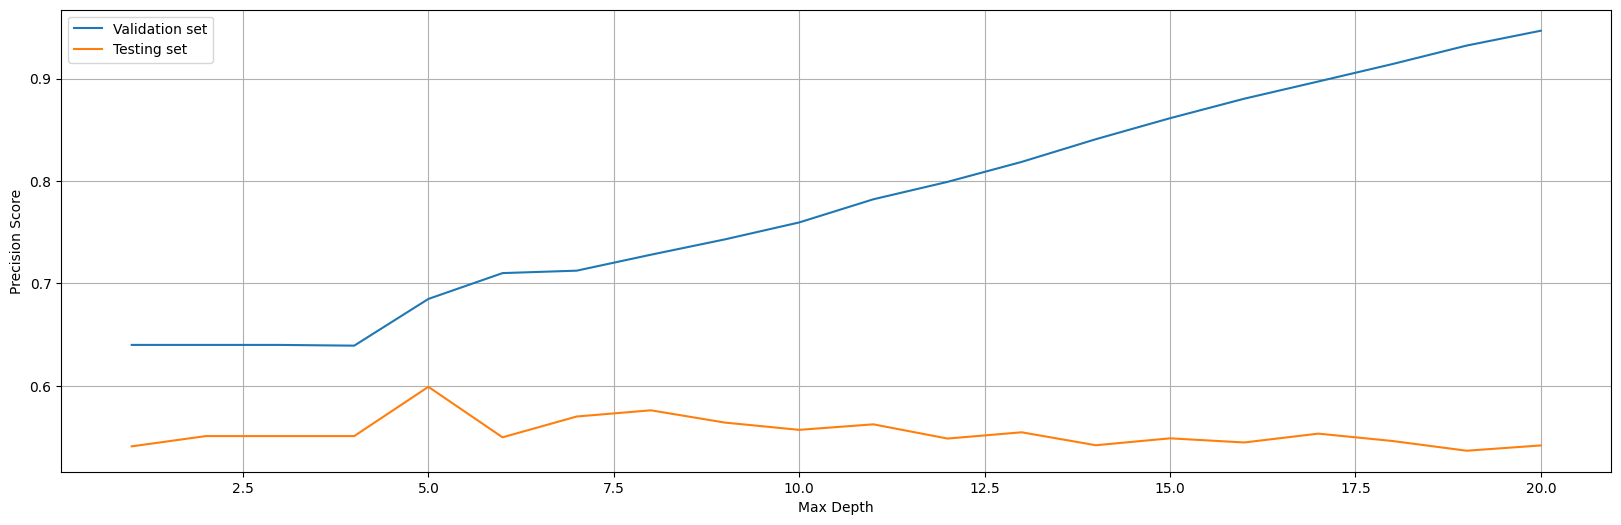

In [ ]:
max_depths = [x for x in range(1, 21)]

plt.figure(figsize=(20, 6))
plt.plot(max_depths, precision_scores_val, label="Validation set")
plt.plot(max_depths, precision_scores_test, label="Testing set")
plt.legend()
plt.grid()
plt.xlabel("Max Depth")
plt.ylabel("Precision Score");


---
### [EXPLORATORY] Question 5: What data is missing?

Now that you have gained insights from the correlation analysis and Decision Tree results regarding the most influential variables, suggest new indicators you would like to include in the dataset and explain your reasoning.

Alternatively, you may propose a completely different approach based on your intuition, provided it remains relevant to the shared dataset of the largest stocks from India, the EU, and the US. If you choose this route, please also specify the data source.
